In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [3]:
data = pd.read_csv('1.04. Real-life example.csv')
data.head()

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year         Model  
0          yes  1991           320  
1          yes  1999  Sprinter 212  
2          yes  2003         S 500  
3          yes  2007            Q7  
4          yes  2011         Rav 4

In [4]:
data.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         4345         4345  4345.000000     4345  
unique           4            2          NaN      312  
top         Diesel          yes          NaN  E-Class  
freq          2019         3947          NaN      199  
mean           NaN          NaN  2006.550058      NaN  
std            NaN          NaN     6.719097      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2003.000000      NaN  
50%            NaN          NaN  2008.000000      NaN  
75%            NaN          NaN  2012.000000      NaN  
max            NaN          NaN  2016.000000      NaN

In [5]:
# drop the model column, 
#axis 0 stands for rows, 1 for columns
data = data.drop(['Model'], axis=1)
data.head()

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year  
0          yes  1991  
1          yes  1999  
2          yes  2003  
3          yes  2007  
4          yes  2011

In [6]:
# check for missing values
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [7]:
data_no_mv = data.dropna(axis=0)

C:\Users\Tim\Anaconda3\envs\datascience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


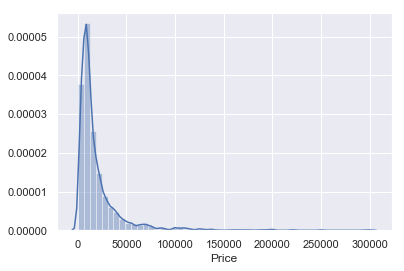

In [8]:
# Exploring the Probability Distribution Frequency
sns.distplot(data_no_mv['Price'])

In [9]:
# one way to get rid of outliers is to remove the top 1% of observations
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]

In [10]:
q

129812.51999999981

In [11]:
data_1.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3984    3984.000000   3984  3984.000000  3984.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           880            NaN   1528          NaN          NaN   
mean           NaN   17837.117460    NaN   165.116466     2.743770   
std            NaN   18976.268315    NaN   102.766126     4.956057   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6980.000000    NaN    93.000000     1.800000   
50%            NaN   11400.000000    NaN   160.000000     2.200000   
75%            NaN   21000.000000    NaN   230.000000     3.000000   
max            NaN  129222.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         3984         3984  3984.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1853         3613          NaN  
mean           NaN          NaN  2006.292922  
std            NaN          NaN     6.672745  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2002.750000  
50%            NaN          NaN  2007.000000  
75%            NaN          NaN  2011.000000  
max            NaN          NaN  2016.000000

C:\Users\Tim\Anaconda3\envs\datascience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


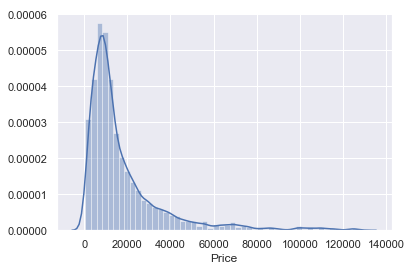

In [12]:
sns.distplot(data_1['Price'])

C:\Users\Tim\Anaconda3\envs\datascience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


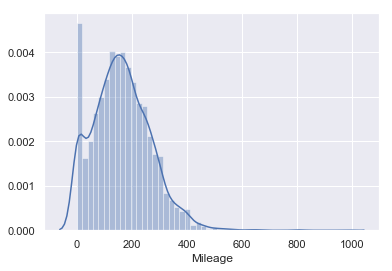

In [13]:
sns.distplot(data_no_mv['Mileage'])

In [14]:
q = data_1['Mileage'].quantile(.99)
data_2 = data_1[data_1['Mileage']<q]

C:\Users\Tim\Anaconda3\envs\datascience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


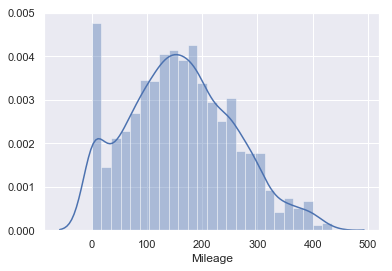

In [15]:
sns.distplot(data_2['Mileage'])

C:\Users\Tim\Anaconda3\envs\datascience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


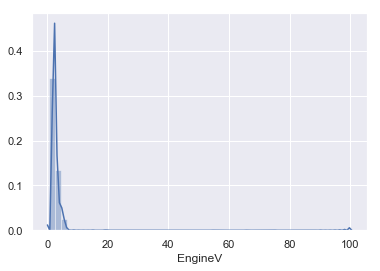

In [16]:
sns.distplot(data_no_mv['EngineV'])
# wrong values

C:\Users\Tim\Anaconda3\envs\datascience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


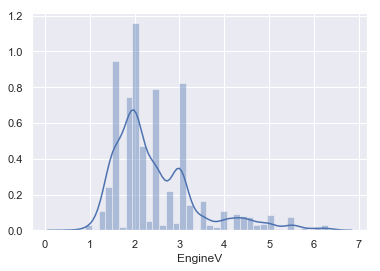

In [17]:
data_3 = data_2[data_2['EngineV']<6.5]
sns.distplot(data_3['EngineV'])

C:\Users\Tim\Anaconda3\envs\datascience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


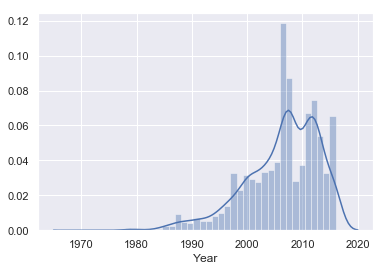

In [18]:
sns.distplot(data_no_mv['Year'])

In [19]:
q = data_3['Year'].quantile(.01)
data_4 = data_3[data_3['Year']>q]

C:\Users\Tim\Anaconda3\envs\datascience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


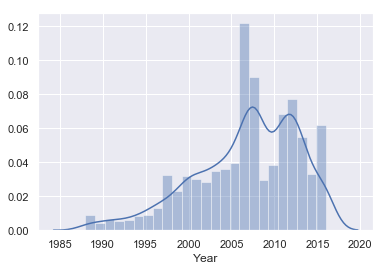

In [20]:
sns.distplot(data_4['Year'])

In [21]:
# reset the index
data_cleaned = data_4.reset_index(drop=True)


In [22]:
data_cleaned.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3867    3867.000000   3867  3867.000000  3867.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           848            NaN   1467          NaN          NaN   
mean           NaN   18194.455679    NaN   160.542539     2.450440   
std            NaN   19085.855165    NaN    95.633291     0.949366   
min            NaN     800.000000    NaN     0.000000     0.600000   
25%            NaN    7200.000000    NaN    91.000000     1.800000   
50%            NaN   11700.000000    NaN   157.000000     2.200000   
75%            NaN   21700.000000    NaN   225.000000     3.000000   
max            NaN  129222.000000    NaN   435.000000     6.300000   

       Engine Type Registration         Year  
count         3867         3867  3867.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1807         3505          NaN  
mean           NaN          NaN  2006.709853  
std            NaN          NaN     6.103870  
min            NaN          NaN  1988.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2008.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

In [23]:
# Checking the OLS assumptions

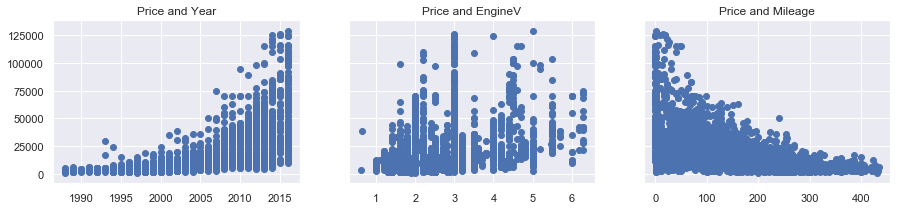

In [24]:
# Here we decided to use some matplotlib code, without explaining it
# You can simply use plt.scatter() for each of them (with your current knowledge)
# But since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

C:\Users\Tim\Anaconda3\envs\datascience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


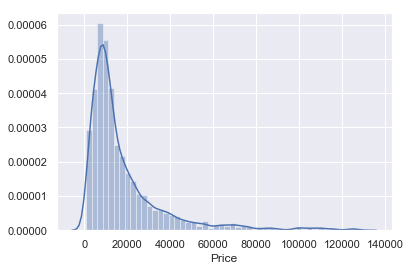

In [25]:
sns.distplot(data_cleaned['Price'])

In [26]:
# should transform since these are not linear and exponential, should do a log
# transformation

In [27]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned.head()

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year  log_price  
0          yes  1991   8.342840  
1          yes  1999   8.974618  
2          yes  2003   9.495519  
3          yes  2007  10.043249  
4          yes  2011   9.814656

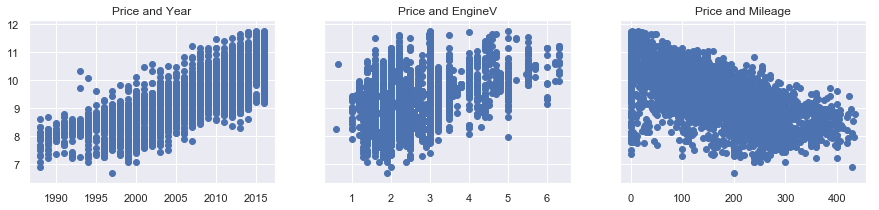

In [28]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Price and Mileage')


plt.show()

In [29]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

In [30]:
# Multicollinarity
# No Endogeneity
# Normality is assumed
# Zero mean acomplished by including intercept
# Homoscdacity - since we implemented a log transformation
# No auto-correclation 

In [31]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [32]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it

# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_cleaned[['Mileage','Year','EngineV']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [33]:
vif

VIF Features
0   3.791584  Mileage
1  10.354854     Year
2   7.662068  EngineV

In [34]:
# When VIF = 1: means no multicollinearity
# 1 < VIF < 5: okay
# 10 < VIF: unacceptable

In [35]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)

In [36]:
data_no_multicollinearity.head()

Brand       Body  Mileage  EngineV Engine Type Registration  \
0            BMW      sedan      277      2.0      Petrol          yes   
1  Mercedes-Benz        van      427      2.9      Diesel          yes   
2  Mercedes-Benz      sedan      358      5.0         Gas          yes   
3           Audi  crossover      240      4.2      Petrol          yes   
4         Toyota  crossover      120      2.0      Petrol          yes   

   log_price  
0   8.342840  
1   8.974618  
2   9.495519  
3  10.043249  
4   9.814656